In [46]:
from SLiCAP import *
import sympy as sp

In [47]:
prj = initProject('Active Antenna')

# Task description

In [48]:
htmlPage('Task description');
head2html('General Task');
text2html('Determine the design parameters for two design CS-stages: $V_{DS}$, $I_{DS}$, $W$ and $L$. The antenna has a characteristic impedance of $50 Ohm$.');
head2html('1. output stage');
text2html('A CS-stage that can drive the load of the active antenna taking the connecting cable into consideration and driving the load at its characteristic impedance.');
head2html('2. input stage');
text2html('A CS-stage whose equivalent noise sources fulfil the requirement of the active antenna. For this design the source is considered to be a purely capactive load with a capacitance of $1.5 pF$. The detailed noise requirements are taken from the application description');

# CS Stage Amplifier -  Drive Stage

In [49]:
makeNetlist('CSstage.asc', 'Drive stage')

/Users/arthuradmiraal/Documents/TU Delft/Master/StructuredElectronicsDesign/Structured_Electronic_Design/cir/CSstage.asc


In [50]:
i1 = instruction()
i1.setCircuit('CSstage.cir')

No errors found for circuit: 'Drive stage' from file: 'CSstage.cir'.



In [51]:
#htmlPage('CS Drive Stage')
HTML(head2html('Introduction'))
txt = "The active antenna is loaded with 50 $\Omega$ coaxial cable. \
Given a 1 dB compression level of 0 dBm at the output of the amplifier. This means an output power of 1 mW. \
Therefore, the output rms voltage is $V_o= \sqrt{P \cdot R_o} = \sqrt{1\;mW \cdot 50\;\Omega} = 0.2236\; V$. \
The output rms current is $I_o = V_o/R_o = 0.2236\; V / 50\;\Omega = 4.472\; mA$. \
From these values we get the peak voltage $V_p = \sqrt{2} \cdot 0.2236 = 316.2\; mV$ and the peak value of the current is \
$I_p = 6.324\; mA$. \n \
The biasing voltage $V_{DS}$ the biasing current $I_D$ should ensure the required peak voltage and current of the load \
.Furthermore, the antenna is modeled as voltage source with a capacitor in series."

text2html(txt)

'<p>The active antenna is loaded with 50 $$\\Omega$$ coaxial cable. Given a 1 dB compression level of 0 dBm at the output of the amplifier. This means an output power of 1 mW. Therefore, the output rms voltage is $$V_o= \\sqrt{P \\cdot R_o} = \\sqrt{1\\;mW \\cdot 50\\;\\Omega} = 0.2236\\; V$$. The output rms current is $$I_o = V_o/R_o = 0.2236\\; V / 50\\;\\Omega = 4.472\\; mA$$. From these values we get the peak voltage $$V_p = \\sqrt{2} \\cdot 0.2236 = 316.2\\; mV$$ and the peak value of the current is $$I_p = 6.324\\; mA$$. \n The biasing voltage $$V_{DS}$$ the biasing current $$I_D$$ should ensure the required peak voltage and current of the load .Furthermore, the antenna is modeled as voltage source with a capacitor in series.</p>\n'

In [52]:
HTML(head2html('SLiCAP Circuit diagram'))
HTML(netlist2html('CSstage.cir'))
HTML(img2html('CSstage.svg', 600))

In [53]:
HTML(head2html('LTSpice Circuit diagram'))
HTML(img2html('CSstage_Vs.svg', 600))

In [54]:
HTML(head2html('Circuit parameters'))
txt = " The biasing sources are given some margin in comparison to the calculated values. \
$V_{DS} = 0.9\; V$ and $I_{DS} = 10\; mA$. \
To achieve an optimal aspect ratio $W/L$ without oversizing $W$, \
we choose the minimum length of the technology, $L = 180\; nm$. \
For this minimum length we have a critical inversion coefficient $IC_{CRIT} = 31.71$. \
To operate in strong inversion, the inversion coefficient $IC$ must be much larger than 1 but below $IC_{CRIT}$. \n\
The inversion coefficient is given by: "

text2html(txt)
IC, ID, L, I0, W = sp.symbols("IC I_D L I_0 W")
eqn = ID*L/(I0*W)
eqn2html(IC, eqn, units='', label='', labelText='')

'$$\\begin{equation}\nIC=\\frac{I_{D} L}{I_{0} W}\n\\end{equation}\n$$'

In [55]:
txt = "From this equation we calculate the minimum and maximum width such that IC ranges from 1 up to $IC_{CRIT} = 31.71$. \
The minimum width, which corresponds to $IC = IC_{CRIT}$, is $W_{min} = 88 \;{\mu}m$ with $V_{GS} = 750 \;mV$ \
and the maximum width is\
$W_{max} = 2800\; {\mu}m$  which corresponds to $I_C = 1$, i.e. weak inversion with $V_{GS} = 400\;mV$.\n \
To operate in strong inversion and keep the width as short as possible, \
we choose $IC =14$, which requires using $W = 200\; {\mu}m$. The resulting gate voltage obtaind with LTSpice \
is $V_{GS} = 737\; mV$ and the gate voltage obtained with SLiCAP is $V_{GS} = 620 \;mV$."

text2html(txt)

'<p>From this equation we calculate the minimum and maximum width such that IC ranges from 1 up to $$IC_{CRIT} = 31.71$$. The minimum width, which corresponds to $$IC = IC_{CRIT}$$, is $$W_{min} = 88 \\;{\\mu}m$$ with $$V_{GS} = 750 \\;mV$$ and the maximum width is$$W_{max} = 2800\\; {\\mu}m$$  which corresponds to $$I_C = 1$$, i.e. weak inversion with $$V_{GS} = 400\\;mV$$.\n To operate in strong inversion and keep the width as short as possible, we choose $$IC =14$$, which requires using $$W = 200\\; {\\mu}m$$. The resulting gate voltage obtaind with LTSpice is $$V_{GS} = 737\\; mV$$ and the gate voltage obtained with SLiCAP is $$V_{GS} = 620 \\;mV$$.</p>\n'

In [56]:
HTML(head2html('LTSpice Simulations'))
HTML(img2html('VoVin.svg', 600))

In [57]:
HTML(img2html('IoVin.svg', 600))

In [58]:
HTML(head2html('Circuit Data'))
HTML(elementData2html(i1.circuit))

RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
C1,N001 in,,C,value,$$Cs$$,$$1.5 \cdot 10^{-12}$$
Cdb_M1_XU1,out 0,,C,value,$$c_{db XU1}$$,$$3.6 \cdot 10^{-14}$$
Cdg_M1_XU1,out in,,C,value,$$c_{dg XU1}$$,$$6.0 \cdot 10^{-14}$$
Cgb_M1_XU1,in 0,,C,value,$$c_{gb XU1}$$,$$2.62 \cdot 10^{-14}$$
Cgs_M1_XU1,in 0,,C,value,$$c_{gs XU1}$$,$$2.621 \cdot 10^{-13}$$
Csb_M1_XU1,0 0,,C,value,$$c_{sb XU1}$$,$$3.6 \cdot 10^{-14}$$
Gb_M1_XU1,out 0 0 0,,g,value,$$g_{b XU1}$$,$$0.02069$$
Gm_M1_XU1,out 0 in 0,,g,value,$$g_{m XU1}$$,$$0.05912$$
Go_M1_XU1,out 0 out 0,,g,value,$$g_{o XU1}$$,$$0.001389$$
R1,out 0,,R,value,$$R_{L}$$,$$50.0$$


In [59]:
import numpy as np
import matplotlib.pyplot as plt

88.50583555837855
2806.588986352036
0.752811516458128
0.397784678263626
Ic = 13.997806169390604 and W_opt = 200.50206099362077 um


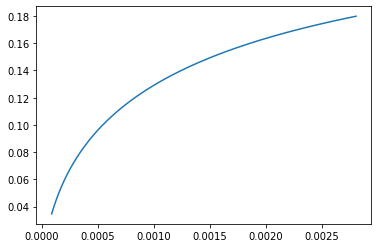

Ic = 13.997806169390604 and W_opt = 200.50206099362077 um and V_GS = 0.619472887712508 v 


In [60]:
I0 = float(i1.getParValue('I_0_N18'))
Id = float(i1.getParValue('ID'))
L = float(i1.getParValue('L'))
Iccrit = float(i1.getParValue('IC_CRIT_XU1'))
Ns = float(i1.getParValue('N_s_N18'))
Ut = float(i1.getParValue('U_T'))

W_min = (Id*L)/(Iccrit*I0)
W_max = (Id*L)/(I0)
print(W_min*1e6)
print(W_max*1e6)
i1.defPar('W', W_min)
print(i1.getParValue('V_GS_XU1'))
i1.defPar('W', W_max)
print(i1.getParValue('V_GS_XU1'))

W = np.linspace(float(W_min), float(W_max), int(10e3))
Ic = (L*Id)/(I0*W)
Icn = Ic/Iccrit
gm = Id/(Ns*Ut*np.sqrt(1+Ic*(1+Icn)+0.5*np.sqrt(Ic*(1+Icn))))
Ic_target = 14
idx = np.where(Ic <= Ic_target)[0][0]
Ic_found = Ic[idx]
W_opt = L*Id/(I0*Ic_found)
print(f'Ic = {Ic_found} and W_opt = {W_opt*1e6} um')
plt.plot(W, gm)
plt.show()

i1.defPar('W', W_opt)

Vgs = i1.getParValue('V_GS_XU1');
print(f'Ic = {Ic_found} and W_opt = {W_opt*1e6} um and V_GS = {Vgs} v ')

In [61]:
HTML(params2html(i1.circuit))

Name,Symbolic,Numeric
$$CGBO_{N18}$$,$$1.0 \cdot 10^{-12}$$,$$1.0 \cdot 10^{-12}$$
$$CGSO_{N18}$$,$$3.0 \cdot 10^{-10}$$,$$3.0 \cdot 10^{-10}$$
$$CJB_{0 N18}$$,$$0.001$$,$$0.001$$
$$C_{OX N18}$$,$$\frac{\epsilon_{0} \epsilon_{SiO2}}{TOX_{N18}}$$,$$0.008422$$
$$Cs$$,$$1.5 \cdot 10^{-12}$$,$$1.5 \cdot 10^{-12}$$
$$E_{CRIT N18}$$,$$5.6 \cdot 10^{6}$$,$$5.6 \cdot 10^{6}$$
$$ID$$,$$0.01$$,$$0.01$$
$$I_{0 N18}$$,$$2 C_{OX N18} N_{s N18} U_{T}^{2} u_{0 N18}$$,$$6.413 \cdot 10^{-7}$$
$$L$$,$$1.8 \cdot 10^{-7}$$,$$1.8 \cdot 10^{-7}$$
$$LDS_{N18}$$,$$1.8 \cdot 10^{-7}$$,$$1.8 \cdot 10^{-7}$$


In [62]:
HTML(head2html('CS stage small-signal dynamic behavior'))

In [63]:
i1.setSimType('numeric');
# i1.setSimType('symbolic');
i1.setGainType('gain');
i1.setDataType('laplace');
i1.setSource('V1');
i1.setDetector('V_out');

In [64]:
gain = i1.execute()
HTML(head2html('Transfer function numeric expression'))

In [65]:
HTML(eqn2html('Z_t', gain.laplace))

In [66]:
HTML(head2html('Bode plots'))

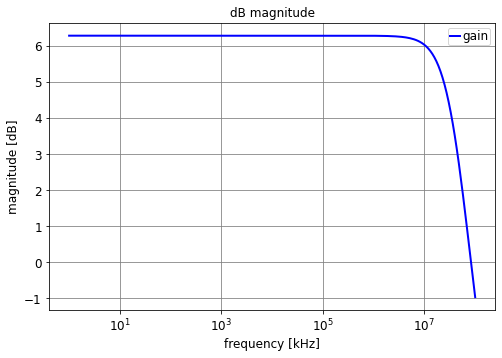

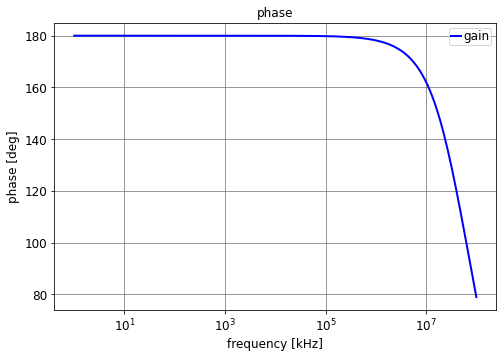

'/Users/arthuradmiraal/Documents/TU Delft/Master/StructuredElectronicsDesign/Structured_Electronic_Design/html/img/phaseZt.svg.svg'

In [67]:
dBmagZt = plotSweep('dBmagZt.svg', 'dB magnitude', gain, 1, 100e6, 200, funcType = 'dBmag', sweepScale = 'k', show=True)
fig2html(dBmagZt, 600)

phaseZt = plotSweep('phaseZt.svg', 'phase', gain, 1, 100e6, 200, funcType = 'phase', sweepScale = 'k', show=True)
fig2html(phaseZt, 600)

In [68]:
HTML(head2html('Conclusion'))
txt = "From the voltage transfer and voltage to curent transfer characteristics, we can conclude that the output \
voltage and current pass through the origin. From the voltage transfer characteristic,\
we can see that the output voltage is approximately linear for $-200 \; (mV) \; \leq V_{in} \leq 200 \; (mV)$. \
From $Io(Vi)$ characteristic, the output current \
is approximately linear when $-100\; (mV)\; \leq V_{in} \leq 100\; (mV)$. \
Finally, we conclude that the output stage can be realized in 180 nm CMOS technology."

text2html(txt)

'<p>From the voltage transfer and voltage to curent transfer characteristics, we can conclude that the output voltage and current pass through the origin. From the voltage transfer characteristic,we can see that the output voltage is approximately linear for $$-200 \\; (mV) \\; \\leq V_{in} \\leq 200 \\; (mV)$$. From $$Io(Vi)$$ characteristic, the output current is approximately linear when $$-100\\; (mV)\\; \\leq V_{in} \\leq 100\\; (mV)$$. Finally, we conclude that the output stage can be realized in 180 nm CMOS technology.</p>\n'

# Input stage (noise analysis)

In [69]:
import SLiCAP as slicap

In [70]:
noise_analysis = slicap.instruction()
noise_model_file = 'NoiseModel.net'
noise_analysis.setCircuit(noise_model_file)
noise_analysis.setSimType('symbolic')

noise_analysis.setSource('Vant')        # Lets noise analysis calculate source-reffered contributions
noise_analysis.setDetector('V_Vout')    # Find source-referred noise voltage
noise_analysis.setGainType('vi')        # Only compatabile data type with noise analysis
noise_analysis.setDataType('noise')     # Perform noise analysis

Warning less than two connections at node: 'Vout'.
No errors found for circuit: 'Input noise modelling' from file: 'NoiseModel.net'.



In [71]:
noise_analysis.defPar('I_G', '0')
noise_analysis.defPar('C_ant', '1.5e-12')
noise_analysis.defPar('V_ant', '0')

In [72]:
noise_result = noise_analysis.execute() # Execute the instruction and assign the results to 'result'

In [73]:
# introduce the page
slicap.text2html('The input stage will dominate the noise performance of the amplifier, since the '   + \
                 'input-reffered noise contributions of the other stages are divided by its gain. '   + \
                 'The goal of this page is to find showstopper values for its characteristics based ' + \
                 'on the input-reffered noise. To this end, we consider a simple input-reffered noise model:')

# show the noise model and its parameters
filename = slicap.img2html('NoiseModel.svg', 800)
slicap.netlist2html(noise_model_file)
slicap.elementData2html(noise_analysis.circuit)
slicap.params2html(noise_analysis.circuit)

# show the noise analysis results
slicap.noise2html(noise_result);

In [74]:
slicap.head2html('Towards design equations')
slicap.text2html('In section, we use the symbolic equations of the noise model to establish '   + \
                 'necessary conditions for the input transistor. To this end, we\'ll start by ' + \
                 'some manipulation of the input-reffered noise PSD:')

"<p>In section, we use the symbolic equations of the noise model to establish necessary conditions for the input transistor. To this end, we'll start by some manipulation of the input-reffered noise PSD:</p>\n"

In [75]:
# helper funtion to show intermediate results
def show_equation(equation):
    display(slicap.HTML('$' + sp.latex(equation) + '$'))

In [76]:
# read in and show input-referred noise PSD
input_noise = noise_result.inoise
input_noise = input_noise.subs(sp.symbols('k_XU1'), sp.symbols('k'))
input_noise = input_noise.subs(sp.symbols('T_XU1'), sp.symbols('T'))
show_equation(input_noise)

In [77]:
# get rid of flicker noise, since at DC I_G goes to 0
input_noise = input_noise.subs('I_G', 0)

# for the NMOS transistor and within this circuit, these values will be positive
# telling sympy allows us to get rid of the absolute value sign
sp.assumptions.assume.global_assumptions.add(sp.Q.positive(sp.symbols('f')))
sp.assumptions.assume.global_assumptions.add(sp.Q.positive(sp.symbols('C_ant')))
sp.assumptions.assume.global_assumptions.add(sp.Q.positive(sp.symbols('f_T_XU1')))
sp.assumptions.assume.global_assumptions.add(sp.Q.positive(sp.symbols('g_m_XU1')))

input_noise = sp.refine(input_noise) # sp.refine takes assumptions into account

show_equation(input_noise)

In [78]:
# restate in terms of c_iss_XU1 and f_T_XU1
input_noise = input_noise.subs('f_T_XU1', noise_analysis.circuit.parDefs[sp.symbols('f_T_XU1')]).simplify()
input_noise = input_noise.subs('R_N_XU1', noise_analysis.circuit.parDefs[sp.symbols('R_N_XU1')])

f_T_XU1_null_definition = noise_analysis.circuit.parDefs[sp.symbols('f_T_XU1')] - sp.symbols('f_T_XU1')
g_m_in_f_t  = sp.solve(f_T_XU1_null_definition, sp.symbols('g_m_XU1'))[0]
input_noise = input_noise.subs(sp.symbols('f_ell_XU1'), sp.symbols('alpha')*sp.symbols('f_T_XU1'))
input_noise = input_noise.subs(sp.symbols('g_m_XU1'), g_m_in_f_t)

input_noise = sp.simplify(input_noise)
input_noise = sp.together(input_noise)

show_equation(input_noise)

In [79]:
# find value for alpha
alpha = noise_analysis.circuit.parDefs[sp.symbols('f_ell_XU1')] / noise_analysis.circuit.parDefs[sp.symbols('f_T_XU1')]
alpha = alpha.subs('R_N_XU1', noise_analysis.circuit.parDefs[sp.symbols('R_N_XU1')])
eta   = sp.symbols('c_iss_XU1') / (sp.symbols('L')*sp.symbols('W')*sp.symbols('C_OX_N18'))
alpha = alpha * sp.symbols('eta') / eta
alpha = alpha.simplify()

In [80]:
# find value for eta_0
eta_0 = eta.subs(noise_analysis.circuit.parDefs).subs(noise_analysis.circuit.parDefs).simplify()
show_equation(eta_0.subs(noise_analysis.circuit.parDefs).subs(noise_analysis.circuit.parDefs).evalf())
eta_subs = eta_0
eta_0 = sp.Limit(eta_0, sp.symbols('W'), sp.oo).simplify()
eta_0 = sp.Limit(eta_0, sp.symbols('L'), sp.oo).simplify()
show_equation(eta_0.subs(noise_analysis.circuit.parDefs).subs(noise_analysis.circuit.parDefs).evalf())

In [81]:
# also commit this to documentation
slicap.text2html('Which can be restated as:')
slicap.eqn2html(sp.symbols('S_av'), input_noise)
slicap.text2html('In which:')
slicap.eqn2html(sp.symbols('alpha'), alpha)
slicap.text2html('With:')
slicap.eqn2html(sp.symbols('eta'), eta)
slicap.text2html('$\eta$ is not fully dependent on the dimensions. It can be expressed as:')
slicap.eqn2html(sp.symbols('eta'), eta_subs > eta_0)
slicap.text2html('Using this $\eta=\eta_0$, an lower bound for the noise is obtained:')

input_noise = input_noise.subs(sp.symbols('eta'), eta_0)

slicap.eqn2html(sp.symbols('S_av'), input_noise)

'$$\\begin{equation}\nS_{av}=\\frac{0.3333 N_{s N18} T k \\left(C_{ant} + c_{iss XU1}\\right)^{2} \\left(4 IC_{XU1} + 3\\right) \\left(\\alpha f_{T XU1} + f\\right)}{\\pi C_{ant}^{2} c_{iss XU1} f f_{T XU1} \\left(IC_{XU1} + 1\\right)}\n\\end{equation}\n$$'

In [82]:
# optimise out c_iss_XU1
optimal_c_iss_XU1 = sp.solve((sp.diff(input_noise, sp.symbols('c_iss_XU1'))*sp.symbols('c_iss_XU1')**2).simplify(), sp.symbols('c_iss_XU1'))
optimal_c_iss_XU1_higher = [(c>0).subs(noise_analysis.circuit.parDefs).simplify() for c in optimal_c_iss_XU1]
c_iss_index = [i for i,x in enumerate(optimal_c_iss_XU1_higher) if x][0]
optimal_c_iss_XU1 = optimal_c_iss_XU1[c_iss_index]

input_noise = input_noise.subs(sp.symbols('c_iss_XU1'), optimal_c_iss_XU1).simplify()

show_equation(optimal_c_iss_XU1)
show_equation(input_noise)

In [83]:
# also commit this to documentation
slicap.text2html(('There is an optimum value for $c_{{issXU1}}={}$. Then the minimum noise is:' \
                 ).format(sp.latex(optimal_c_iss_XU1)))
slicap.eqn2html(sp.symbols('S_av'), input_noise)

# Restate noise requirements
slicap.head3html('Noise requirements')
slicap.text2html('The required noise envelope can be decomposed in two components: a ' + \
                 'frequency-independent white thermal noise component and a frequency-dependent ' + \
                 'red noise component. The noise model also has a frequency-indepedent and a ' + \
                 'frequency-dependent component. If either of these components is higher than ' + \
                 'the associated noise envelope component, the circuit won\'t meet the ' + \
                 'specifications. Hence, we can separate these out.')

# Pick highest frequency for 1/f noise, since 1/f faloff is slower than envelope 1/f**2 faloff
antenna_length             = 18e-2
max_thermal_noise_field    = 5e-9        # 5nVm/rtHz
max_pink_noise_scale_field = 10e-9       # 10nVm/rtHz @ 100kHz
max_pink_noise_f           = 100e3
max_thermal_noise          = (max_thermal_noise_field * antenna_length)**2
max_pink_noise_scale       = (max_pink_noise_scale_field * antenna_length)**2 * max_pink_noise_f

# ToDo: complete this, ideally in a table
slicap.text2html(('From the specifications, the thermal noise should not exceed ' + \
                 '${}\,\mathrm{{W}}\mathrm{{Hz}}^{{-1}}$ and the multiplier of the ' + \
                 '$1/f$ noise should not exceed ${}\,\mathrm{{W}}\mathrm{{Hz}}^{{-1}}$.') \
                 .format(sp.latex(max_thermal_noise), sp.latex(max_pink_noise_scale)));

In [84]:
# isolate thermal and pink noise
n,d = sp.fraction(input_noise)
first_order = sp.Poly(n,sp.symbols('f')).all_coeffs()[0]
constant    = sp.Poly(n,sp.symbols('f')).all_coeffs()[1]

first_order = sp.factor(first_order)
constant    = sp.factor(constant)

constant_noise = sp.simplify(first_order * sp.symbols('f') / d)
pink_noise     = sp.simplify(constant / d)

In [85]:
# report isolated expressions
slicap.head3html('Isolating the components')
slicap.expr2html(sp.symbols('S_av_thermal') > constant_noise)
slicap.text2html('')
slicap.expr2html(sp.symbols('S_av_pink') > pink_noise);

show_equation(constant_noise)
show_equation(pink_noise)

In [86]:
constant_noise = constant_noise.subs(sp.symbols('alpha'), alpha).simplify()
pink_noise     = pink_noise.subs(sp.symbols('alpha'), alpha).simplify()

In [87]:
show_equation(constant_noise)
show_equation(pink_noise)

In [88]:
min_pink_noise = (pink_noise * sp.symbols('f')).subs(sp.symbols('eta'), eta_0)
min_pink_noise = min_pink_noise.subs(noise_analysis.circuit.parDefs)
min_pink_noise = min_pink_noise.subs(noise_analysis.circuit.parDefs)
min_pink_noise = min_pink_noise.subs(noise_analysis.circuit.parDefs)
show_equation(min_pink_noise.evalf())
show_equation(max_pink_noise_scale)

In [89]:
replaceable_pardefs = dict(noise_analysis.circuit.parDefs)
del replaceable_pardefs[sp.symbols('f_T_XU1')]
del replaceable_pardefs[sp.symbols('IC_XU1')]

min_constant_noise = constant_noise
min_constant_noise = min_constant_noise.subs(replaceable_pardefs)
min_constant_noise = min_constant_noise.subs(replaceable_pardefs)
min_constant_noise = sp.Limit(min_constant_noise, sp.symbols('IC_XU1'), 0).simplify()
min_constant_noise = min_constant_noise.evalf()
show_equation(min_constant_noise < max_thermal_noise)
f_T_XU1 = sp.solveset(min_constant_noise < max_thermal_noise, sp.symbols('f_T_XU1'), domain=sp.S.Reals)
f_T_XU1 = f_T_XU1.intersect(sp.Interval(0,sp.oo))
f_T_XU1_min = list(f_T_XU1.boundary)[0]

g_m_XU1_min = sp.solve(noise_analysis.circuit.parDefs[sp.symbols('f_T_XU1')] - sp.symbols('f_T_XU1'), sp.symbols('g_m_XU1'))[0]
g_m_XU1_min = g_m_XU1_min.subs(sp.symbols('c_iss_XU1'), optimal_c_iss_XU1)
g_m_XU1_min = g_m_XU1_min.subs(sp.symbols('f_T_XU1'), f_T_XU1_min)
g_m_XU1_min = g_m_XU1_min.subs(noise_analysis.circuit.parDefs).simplify()

display(slicap.HTML('$ f_{TXU1} > ' + sp.latex(f_T_XU1_min*1e-9) + '\,\mathrm{GHz}$'))
display(slicap.HTML('$ g_{mXU1} > ' + sp.latex(g_m_XU1_min.evalf()) + '$'))

In [90]:
# print design equations
slicap.head3html('Showstopper equations')
slicap.text2html('$$'+sp.latex(sp.symbols('S_av_pink')*sp.symbols('f')) + '>'+ sp.latex(pink_noise) + '='+ sp.latex(min_pink_noise.evalf())+ '<'+sp.latex(sp.symbols('x').subs(sp.symbols('x'),max_pink_noise_scale))+'$$')
slicap.eqn2html(sp.symbols('S_av_thermal') > constant_noise, min_constant_noise < max_thermal_noise);

slicap.text2html('From the thermal noise PSD, we find:')
slicap.text2html('$$ f_{TXU1} > ' + sp.latex(f_T_XU1_min*1e-9) + '\,\mathrm{GHz}$$')

slicap.text2html('However, the minimum $1/f$ is already higher than the maximum $1/f$ ' + \
                 'noise, which is a showstopper. Hence, this application cannot be ' + \
                 'fulfilled in this process without transformers or frequency shifts.')

'<p>However, the minimum $$1/f$$ is already higher than the maximum $$1/f$$ noise, which is a showstopper. Hence, this application cannot be fulfilled in this process without transformers or frequency shifts.</p>\n'